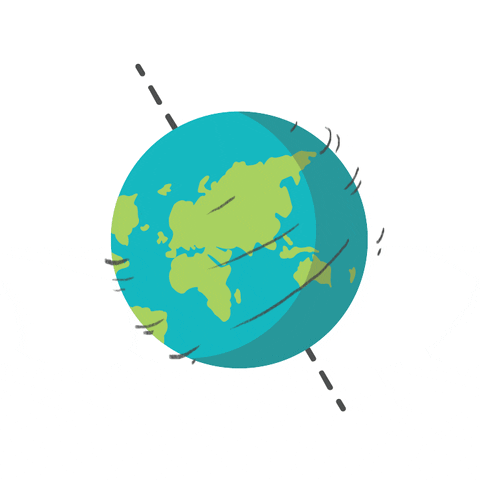
# **POBLACIÓN MUNDIAL 1950 - 2023**

El siguiente dataset contiene datos oficiales de la Organización de las Naciones Unidas sobre la variación en la población mundial en el período 1950-2023. Los datos se separan por país, región y continente, además de mostrar el total del planeta. Tambien, el dataset se divide por sexo, informa sobre mortalidad infantil, expectativa de vida y datos finales de migración.


**PREGUNTAS O ANÁLISIS DE INTERÉS**

*   ¿Hay relación entre la edad de parto y las tasas de natalidad?
*   ¿Afectan los períodos de guerra a la cantidad de nacimientos, además de las muertes? Se analizarán los casos de Vietnam entre 1955 y 1975 y de Afganistán entre 2001 y 2021.
*   Análisis de la situación argentina comparada con los datos latinoamericanos y del caribe desde 2000 hasta 2020, por década.
*   Se utilizará un modelo de regresión lineal para analizar el aumento de expectativa de vida con la cantidad de población.




**IMPORTACIÓN DE LIBRERIAS**

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



**IMPORTACIÓN DE BASE DE DATOS DESDE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
database = pd.read_excel('/content/drive/MyDrive/Poblacion.xlsx')
database.shape

(21312, 31)

**EXPLORACIÓN ANALÍTICA DE DATOS**

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21312 entries, 0 to 21311
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Index                                                        21312 non-null  int64  
 1   REGION, SUBREGION, PAIS O AREA                               21312 non-null  object 
 2   ISO3 Alpha-code                                              17538 non-null  object 
 3   TIPO                                                         21312 non-null  object 
 4   AÑO                                                          21312 non-null  int64  
 5   POBLACION EN MILES                                           21312 non-null  float64
 6   POBLACION MASCULINA EN MILES                                 21312 non-null  float64
 7   POBLACION FEMENINA EN MILES                                  21312 non-null 

**DETECCIÓN DE VALORES AUSENTES Y PRIMERA LIMPIEZA DE DATOS**

<Axes: >

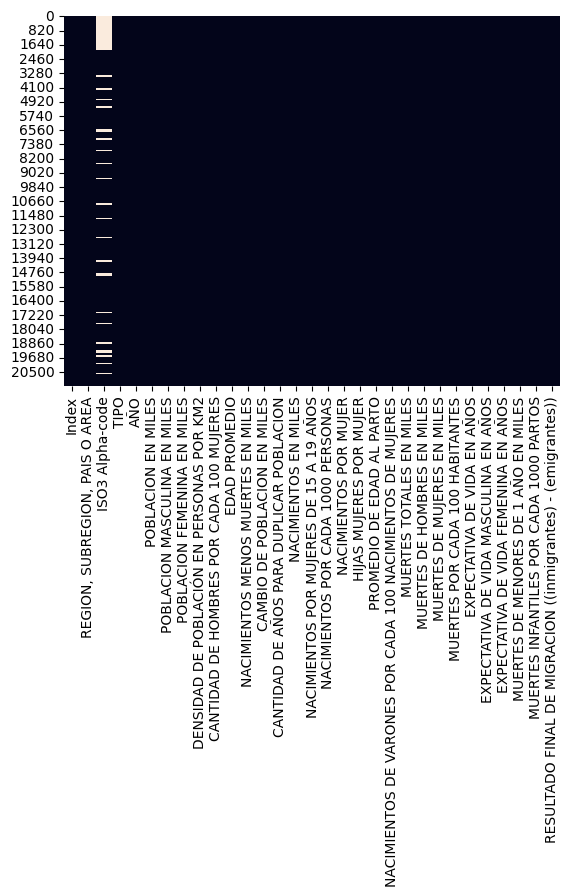

In [ ]:
valores_nulos = database.isnull()

# se imprime la suma de valores nulos de cada columna
database.isnull().sum()

# se grafica con un mapa de calor de seaborn
sns.heatmap(database.isnull(), cbar=False)



Como se ve en el mapa de calor, la única columna con valores ausentes es la del código ISO de país, debido a que los registros mundiales o regionales carecen de dicha identificación.

La columna se descartará ya que no será necesaria para ningún análisis.




In [ ]:
database = database.drop(columns='ISO3 Alpha-code')
#se imprimen los diez primeros registros como prueba de la eliminación de la columna "ISO3 Alpha-code"
database.head(10)

,Index,"REGION, SUBREGION, PAIS O AREA",TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,EDAD PROMEDIO,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
0,1,World,World,1950,2493092.848,1241431.646,1251661.202,19.118,99.183,22.159,...,48486.892,25664.047,22822.845,19.448,46.394,44.465,48.436,12546.353,138.135,0.0
1,2,World,World,1951,2536927.035,1263362.496,1273564.539,19.454,99.199,22.123,...,48176.162,25384.180,22791.982,18.990,47.126,45.300,49.040,12566.473,136.046,0.0
2,3,World,World,1952,2584086.339,1287092.948,1296993.391,19.816,99.237,22.074,...,47383.364,24850.070,22533.294,18.337,48.218,46.525,49.972,12730.864,132.666,0.0
3,4,World,World,1953,2634106.235,1312354.748,1321751.488,20.200,99.289,22.011,...,47239.575,24721.773,22517.802,17.934,48.809,47.162,50.506,12672.102,130.128,0.0
4,5,World,World,1954,2685894.860,1338531.144,1347363.715,20.597,99.344,21.937,...,46662.428,24408.064,22254.364,17.373,49.651,48.013,51.332,12692.620,127.710,0.0
5,6,World,World,1955,2740213.792,1365978.617,1374235.175,21.013,99.399,21.839,...,46635.655,24436.990,22198.665,17.019,50.206,48.521,51.935,12651.210,124.820,0.0
6,7,World,World,1956,2795409.994,1393816.218,1401593.776,21.437,99.445,21.744,...,46479.062,24353.298,22125.764,16.627,50.737,49.041,52.477,12415.248,121.917,0.0
7,8,World,World,1957,2852618.337,1422613.719,1430004.617,21.875,99.483,21.639,...,46880.774,24584.927,22295.847,16.434,51.064,49.348,52.823,12580.776,120.017,0.0
8,9,World,World,1958,2911249.671,1452095.718,1459153.952,22.325,99.516,21.531,...,46518.263,24413.917,22104.346,15.979,51.615,49.862,53.412,12379.393,117.712,0.0
9,10,World,World,1959,2965950.351,1479588.664,1486361.688,22.744,99.544,21.471,...,50724.513,26607.162,24117.351,17.102,49.582,47.838,51.379,12969.870,125.721,0.0


**RELACIÓN ENTRE TASA DE NATALIDAD Y PROMEDIO DE EDAD AL PARTO**

El objetivo del siguiente análisis es determinar si hay una relación lineal entre la cantidad de nacimientos y el promedio de edad de las mujeres al parto.
Se utilizará un gráfico de dispersión para incluir las variables de tiempo, nacimientos y edad promedio.

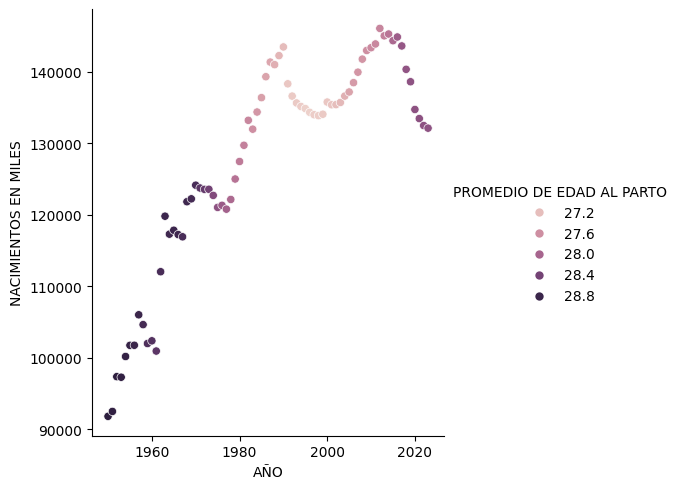

In [ ]:
#Comando para grafico mediante Seaborn, con filtro en datos totales mundiales
sns.relplot( x='AÑO', y='NACIMIENTOS EN MILES', hue='PROMEDIO DE EDAD AL PARTO',
           data=database[database['REGION, SUBREGION, PAIS O AREA'] == 'World'])

En el gráfico se puede observar que la relación era prácticamente líneal entre la baja del promedio de edad y la suba de la cantidad de nacimientos hasta los años 90. A partir del año 2000, luego de una baja en nacimientos y una corta virtual meseta en el promedio de edad, La tendencia se invirtió durante prácticamente una década, con un promedio de edad cada vez más alto pero, a su vez, una suba también en los nacimientos. Luego del 2010, la tendencia de promedio de edad siguió a la suba, pero los nacimientos bajaron.

**ANÁLISIS DE LA SITUACIÓN ARGENTINA RESPECTO A LATINOAMÉRICA**

La idea de este análisis es porcentualizar la cantidad de población de Sudamérica y Argentina sobre toda la macrorregión de América Latina y el Caribe, y determinar si el país se alinea con el continente en totales regionales.

Se utilizarán gráficos de tortas hechos con matplotlib

**2000**

In [ ]:
# imprimimos los registros con la información necesaria
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Latin America and the Caribbean') & (database['AÑO'] == 2000) & (database['TIPO'] == 'Region')]

,Index,"REGION, SUBREGION, PAIS O AREA",TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,EDAD PROMEDIO,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
14850,15522,Latin America and the Caribbean,Region,2000,521323.344,258295.155,263028.189,25.724,98.201,23.15,...,3196.019,1788.692,1407.327,6.131,70.814,67.738,73.986,319.845,27.546,-989.551


In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'South America') & (database['AÑO'] == 2000) & (database['TIPO'] == 'Subregion')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
17736,18408,South America,NaN,Subregion,2000,348018.671,173078.663,174940.008,19.797,98.936,...,2153.44,1218.384,935.056,6.188,70.68,67.379,74.11,197.739,26.94,-287.423


In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Argentina') & (database['AÑO'] == 2000) & (database['TIPO'] == 'Country/Area')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
18476,18482,Argentina,ARG,Country/Area,2000,37213.984,18343.798,18870.186,13.33,97.21,...,281.694,150.118,131.576,7.57,73.91,70.498,77.288,13.382,18.596,-22.775


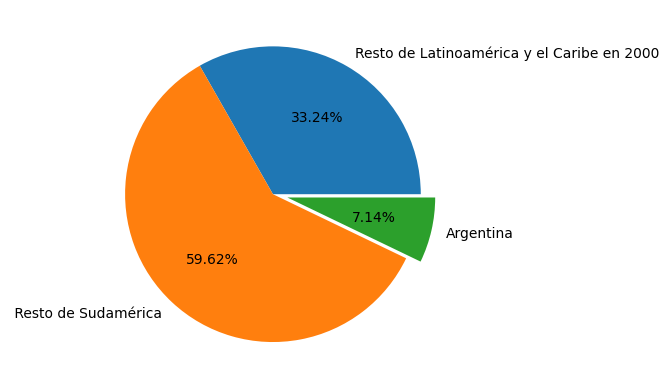

In [ ]:
#comando para el gráfico en matplotlib
poblacion = [521323.344-348018.671, 348018.671-37213.984, 37213.984]
nombres = ['Resto de Latinoamérica y el Caribe en 2000',' Resto de Sudamérica', 'Argentina']
desfase =(0, 0, 0.1)
plt.pie(poblacion, labels=nombres, explode=desfase, autopct='%.2f%%')
plt.show()


**2010**

In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Latin America and the Caribbean') & (database['AÑO'] == 2010) & (database['TIPO'] == 'Region')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
15526,15532,Latin America and the Caribbean,NaN,Region,2010,588907.843,291168.657,297739.187,29.059,97.793,...,3631.885,2013.436,1618.449,6.167,73.22,70.196,76.308,201.698,18.668,-888.119


In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'South America') & (database['AÑO'] == 2010) & (database['TIPO'] == 'Subregion')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
17746,18418,South America,NaN,Subregion,2010,390701.059,193804.304,196896.755,22.225,98.429,...,2342.697,1313.842,1028.855,5.996,74.041,70.755,77.411,111.377,16.629,-579.23


In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Argentina') & (database['AÑO'] == 2010) & (database['TIPO'] == 'Country/Area')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
18486,18492,Argentina,ARG,Country/Area,2010,41288.694,20404.978,20883.716,14.789,97.708,...,314.839,161.596,153.243,7.625,75.68,72.542,78.732,9.987,13.234,-5.003


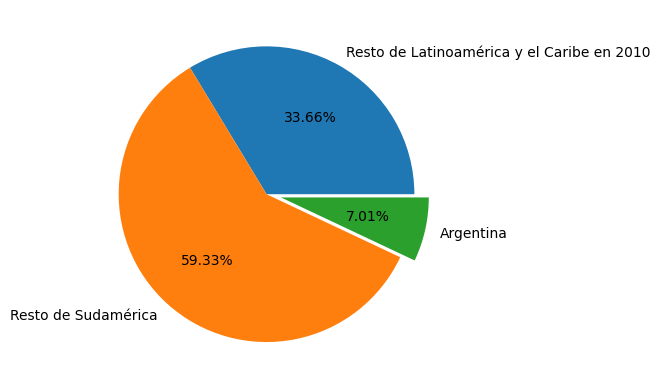

In [ ]:
poblacion = [588907.843-390701.059, 390701.059-41288.694, 41288.694 ]
nombres = ['Resto de Latinoamérica y el Caribe en 2010', 'Resto de Sudamérica', 'Argentina']
desfase =(0, 0, 0.1)
plt.pie(poblacion, labels=nombres, explode=desfase, autopct='%.2f%%')
plt.show()

**2020**

In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Latin America and the Caribbean') & (database['AÑO'] == 2020) & (database['TIPO'] == 'Region')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
15536,15542,Latin America and the Caribbean,NaN,Region,2020,646729.384,318795.236,327934.148,31.912,97.213,...,4965.915,2775.3,2190.615,7.679,73.271,70.015,76.677,136.026,14.029,-608.019


In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'South America') & (database['AÑO'] == 2020) & (database['TIPO'] == 'Subregion')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
17756,18428,South America,NaN,Subregion,2020,426213.516,210858.568,215354.948,24.245,97.912,...,3217.041,1778.814,1438.227,7.548,74.284,71.096,77.618,77.406,13.055,-325.376


In [ ]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Argentina') & (database['AÑO'] == 2020) & (database['TIPO'] == 'Country/Area')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
18496,18502,Argentina,ARG,Country/Area,2020,45191.965,22419.484,22772.48,16.187,98.45,...,381.886,198.55,183.335,8.45,75.878,72.981,78.783,5.326,9.771,0.292


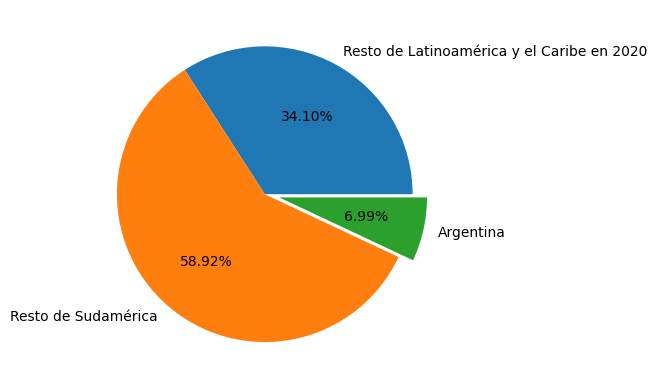

In [ ]:
poblacion = [646729.384-426213.516, 426213.516-45191.965, 45191.965]
nombres = ['Resto de Latinoamérica y el Caribe en 2020', 'Resto de Sudamérica', 'Argentina']
desfase =(0, 0, 0.1)
plt.pie(poblacion, labels=nombres, explode=desfase, autopct='%.2f%%')
plt.show()

Los gráficos nos indican que Argentina acompaña la paulatina baja del porcentaje de población de Sudamérica en el total de Latinoamérica y el Caribe. Las tasas de natalidad del resto de la macrorregión están en aumento en el siglo XXI.

**SITUACIÓN DE PAÍSES EN GUERRA**

Se intentará determinar si los períodos de guerra afectan negativamente a las cantidades de nacimientos.

Se utilizarán gráficos de líneas mediante Seaborn.

*GUERRA DE VIETNAM (1955-1975)*

Aquí tendremos en cuenta el período 1945-1985 para comparar las cantidades de nacimientos.

<Axes: xlabel='AÑO', ylabel='NACIMIENTOS EN MILES'>

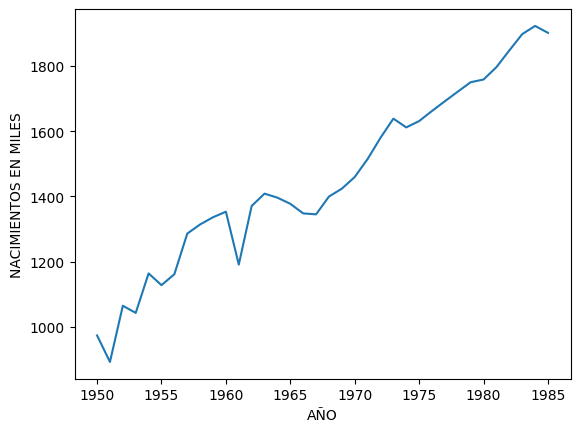

In [ ]:
#comando para gráfico de líneas en seaborn
sns.lineplot( x='AÑO', y='NACIMIENTOS EN MILES',
           data=database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Viet Nam') & (database['AÑO'] > 1944) & (database['AÑO'] < 1986)])

En el caso de Vietnam, observamos una fluctuación en las tasas de nacimientos en los primeros años de la guerra, aunque hay que recalcar que era un fenómeno que se daba de antes del comienzo de la misma. A partir de finales de los 60 la tendencia se mantuvo en alza y continuó de la misma manera aún finalizado el conflicto.

*GUERRA DE AFGANISTÁN (2001-2021)*

En este caso se usará el período 1991-2023

<Axes: xlabel='AÑO', ylabel='NACIMIENTOS EN MILES'>

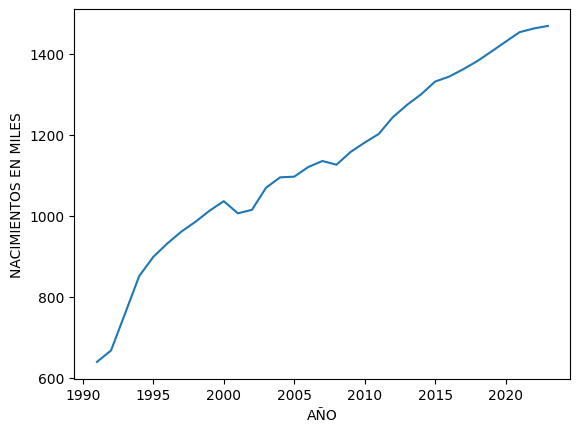

In [ ]:
sns.lineplot( x='AÑO', y='NACIMIENTOS EN MILES',
           data=database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Afghanistan') & (database['AÑO'] > 1990) & (database['AÑO'] < 2024)])

Afganistán es uno de los países con mayor tasa de nacimientos del mundo respecto de su población. Como se puede observar en el gráfico, el comienzo de la guerra (2001) generó una leve caída, pero rápidamente las tasas volvieron a la velocidad anterior y se mantienen de esa manera los dos años posteriores al final.

**ANALISIS MULTIVARIADO Y SEGUNDA LIMPIEZA DE DATOS**

In [ ]:
from sklearn.model_selection import train_test_split


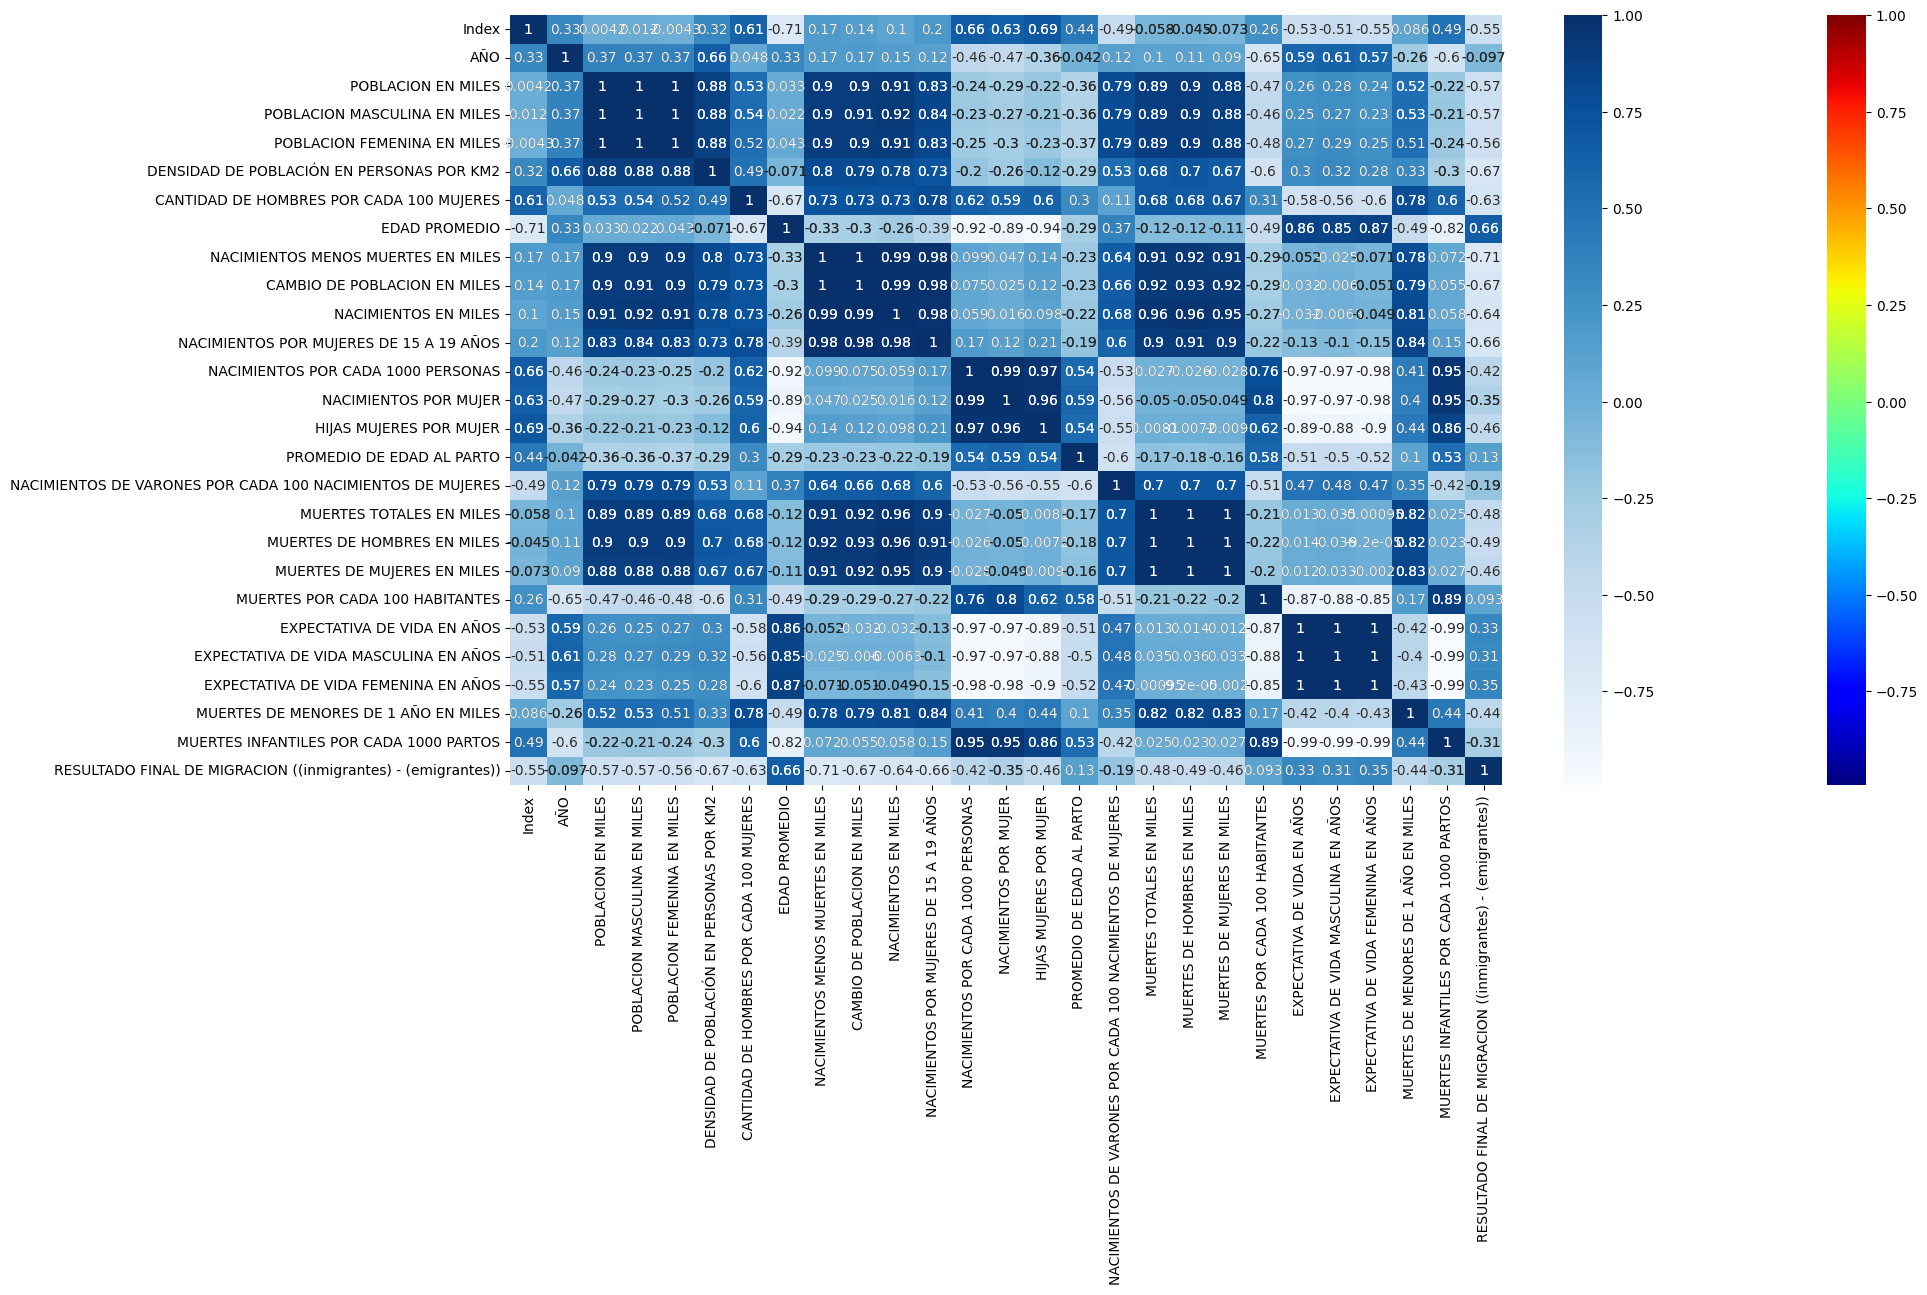

In [ ]:
#se filtran los datos sólo por los agrupados por nivel de desarrollo

database_filtered = database.query("(`REGION, SUBREGION, PAIS O AREA` == 'More developed regions') or (`REGION, SUBREGION, PAIS O AREA` == 'Less developed regions') or (`REGION, SUBREGION, PAIS O AREA` == 'Least developed countries')")

# se utiliza un análisis multivariado para detectar datos relacionados
plt.figure(figsize=(20, 10))
life_corr = database_filtered.corr(numeric_only=True)
sns.heatmap(life_corr,
            xticklabels = life_corr.columns.values,
            yticklabels = life_corr.columns.values,
            annot = True,cmap='jet');
corr = database_filtered.corr(numeric_only=True)
chart = sns.heatmap(corr, annot = True, cmap='Blues')

In [ ]:
#se eliminan datos estrechamente relacionados por considerarlos redundantes
database_filtered = database_filtered.drop(['EXPECTATIVA DE VIDA MASCULINA EN AÑOS','EXPECTATIVA DE VIDA FEMENINA EN AÑOS','POBLACION MASCULINA EN MILES','POBLACION FEMENINA EN MILES','MUERTES DE HOMBRES EN MILES','MUERTES DE MUJERES EN MILES'],axis=1)
database_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 740 to 961
Data columns (total 24 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Index                                                        222 non-null    int64  
 1   REGION, SUBREGION, PAIS O AREA                               222 non-null    object 
 2   TIPO                                                         222 non-null    object 
 3   AÑO                                                          222 non-null    int64  
 4   POBLACION EN MILES                                           222 non-null    float64
 5   DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2                    222 non-null    float64
 6   CANTIDAD DE HOMBRES POR CADA 100 MUJERES                     222 non-null    float64
 7   EDAD PROMEDIO                                                222 non-null    float6

**MODELO DE REGRESIÓN LINEAL**

In [ ]:
#se utiliza one hot encoding para transformar datos
from sklearn.preprocessing import OneHotEncoder
OHE=['REGION, SUBREGION, PAIS O AREA']
ohe= OneHotEncoder()
df_OHE=pd.get_dummies(database_filtered[OHE], columns = OHE)

df_OHE.head()


,"REGION, SUBREGION, PAIS O AREA_Least developed countries","REGION, SUBREGION, PAIS O AREA_Less developed regions","REGION, SUBREGION, PAIS O AREA_More developed regions"
740,False,False,True
741,False,False,True
742,False,False,True
743,False,False,True
744,False,False,True


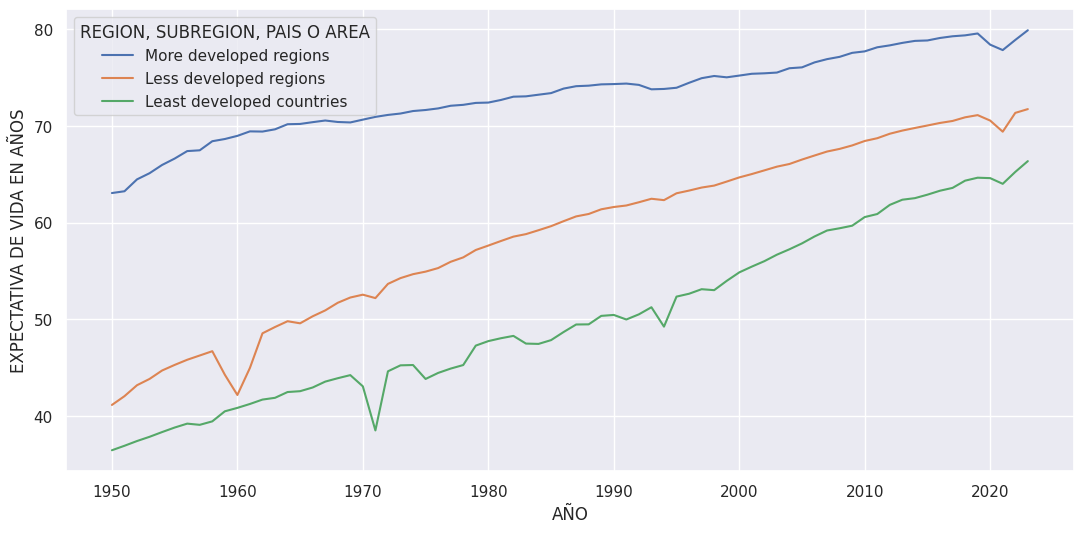

In [ ]:
csns.set(rc = {'figure.figsize':(13,6)})
bar = sns.lineplot(data=database_filtered, x="AÑO", y="EXPECTATIVA DE VIDA EN AÑOS", hue="REGION, SUBREGION, PAIS O AREA")

Se observa que los países subdesarrollados ('Least development countries') han fluctuado más en los datos de expectativa de vida, aunque todas las pendientes son hacia arriba.

In [ ]:
def datab(database_filtered):
    datab=[
        (database_filtered['EXPECTATIVA DE VIDA EN AÑOS']<75),
        (database_filtered['EXPECTATIVA DE VIDA EN AÑOS']>=75)]
    etiqueta=['0','1']
    database_filtered['Expectativa de vida']= np.select(datab, etiqueta)

datab(database_filtered)

In [ ]:
data_x = database_filtered.drop(['REGION, SUBREGION, PAIS O AREA','Index','TIPO','AÑO','CANTIDAD DE AÑOS PARA DUPLICAR POBLACION','EXPECTATIVA DE VIDA EN AÑOS'], axis=1)
data_x

,POBLACION EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,EDAD PROMEDIO,NACIMIENTOS MENOS MUERTES EN MILES,CAMBIO DE POBLACION EN MILES,NACIMIENTOS EN MILES,NACIMIENTOS POR MUJERES DE 15 A 19 AÑOS,NACIMIENTOS POR CADA 1000 PERSONAS,NACIMIENTOS POR MUJER,HIJAS MUJERES POR MUJER,PROMEDIO DE EDAD AL PARTO,NACIMIENTOS DE VARONES POR CADA 100 NACIMIENTOS DE MUJERES,MUERTES TOTALES EN MILES,MUERTES POR CADA 100 HABITANTES,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes)),Expectativa de vida
740,813408.101,16.580,90.314,27.141,9822.334,9521.052,18926.511,1162.322,23.268,2.864,1.230,28.547,105.9,9104.177,11.193,1250.560,65.555,-301.368,0
741,822685.167,16.770,90.514,27.236,9521.334,9033.079,18739.228,1117.002,22.778,2.816,1.214,28.478,105.7,9217.894,11.205,1220.154,64.840,-488.235,0
742,831897.686,16.957,90.685,27.354,9855.669,9391.959,18703.576,1075.833,22.483,2.796,1.222,28.443,105.7,8847.907,10.636,1118.489,59.673,-463.684,0
743,841466.221,17.152,90.847,27.487,9759.779,9745.112,18573.313,1079.374,22.073,2.763,1.219,28.365,105.7,8813.534,10.474,1040.196,55.847,-14.640,0
744,851271.236,17.352,90.993,27.633,10105.310,9864.918,18655.185,1116.119,21.915,2.764,1.228,28.302,105.7,8549.875,10.044,1003.471,53.765,-240.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1058226.906,52.736,98.590,18.727,26498.284,25267.154,34297.043,5366.632,32.410,4.125,1.817,28.693,103.9,7798.759,7.370,1549.191,45.290,-1231.122,0
958,1083853.569,54.013,98.648,18.847,26812.069,25986.173,34843.386,5429.753,32.148,4.077,1.808,28.684,103.9,8031.317,7.410,1519.736,43.727,-825.923,0
959,1109397.232,55.286,98.691,18.958,26907.652,25101.153,35393.887,5466.060,31.904,4.029,1.788,28.689,103.9,8486.235,7.649,1507.225,42.688,-1806.701,0
960,1134811.910,56.553,98.691,19.080,27819.123,25728.203,35945.711,5509.383,31.675,3.984,1.767,28.674,103.9,8126.588,7.161,1526.034,42.553,-2090.932,0


Coefficients: 
 [-1.34578851e-06  4.33435485e-02  6.95592496e-03  9.45722157e-01
  1.42203305e-02 -2.12420159e-02  7.09706535e-03  7.70883524e-05
 -3.01498250e-01  5.00775553e+00 -8.36334876e+00 -3.63769876e-01
 -6.91685923e-01 -7.12326495e-03 -1.31082779e+00 -1.24177114e-04
 -3.77651957e-02  2.11489293e-02 -9.31053672e-01]
Independent term: 
 140.8853334707104
Mean squared error: 0.09
Variance score: 1.00


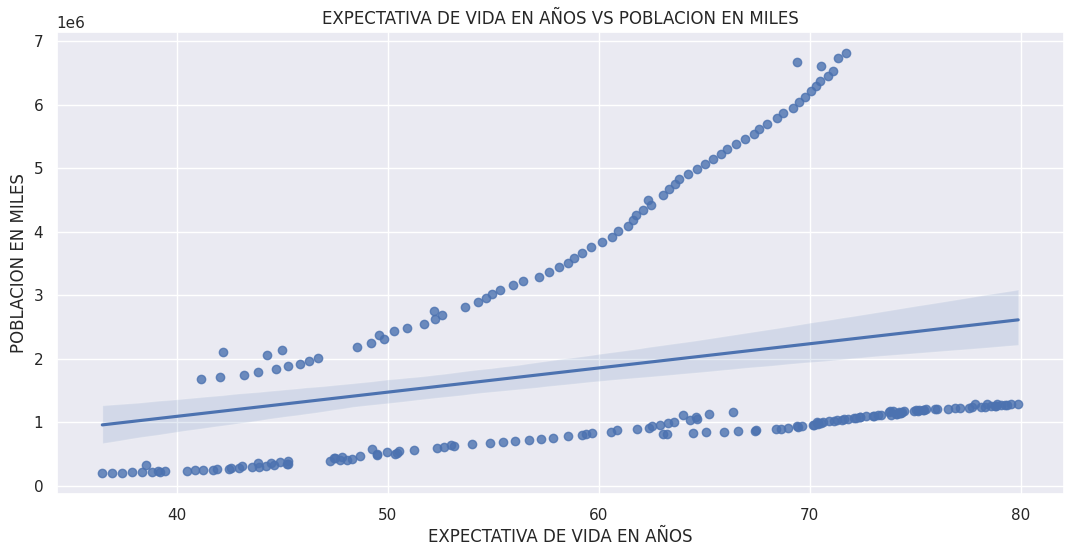

In [60]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

dataX =database_filtered.drop(['REGION, SUBREGION, PAIS O AREA','Index','TIPO','AÑO','CANTIDAD DE AÑOS PARA DUPLICAR POBLACION','EXPECTATIVA DE VIDA EN AÑOS'], axis=1)
X_train = np.array(dataX)
y_train = database_filtered['EXPECTATIVA DE VIDA EN AÑOS'].values

regr = linear_model.LinearRegression()

modelo= regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

sns.regplot(x=database_filtered['EXPECTATIVA DE VIDA EN AÑOS'], y=database_filtered['POBLACION EN MILES'])
plt.title('EXPECTATIVA DE VIDA EN AÑOS VS POBLACION EN MILES')
plt.show()



Se infiere del modelo, que en los países con poca población, el aumento de la misma es proporcional al de la expectativa de vida. Sin embargo, esto no ocurre en los países muy poblados, donde el crecimiento de la población es exponencial y muy superior al ritmo del aumento de expectativa de vida.

**VALIDACIÓN DEL MODELO**

In [64]:
import statsmodels.api as sm

x_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.027e+05
Date:                Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                        14:07:20   Log-Likelihood:                         -99.568
No. Observations:                 222   AIC:                                      235.1
Df Residuals:                     204   BIC:                                      296.4
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Con un ratio de R-squared y Adj. R-squared de 1.000, el modelo es adecuado para el análisis.